<a href="https://colab.research.google.com/github/Daguaaa/data-analytics-portfoli/blob/main/rideshares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

# Upload a CSV file
uploaded = files.upload()

Saving cab_rides.csv to cab_rides.csv


In [3]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [10]:
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='ms')
df[['datetime']].head()



,datetime
0,2018-12-16 09:30:07.890
1,2018-11-27 02:00:23.677
2,2018-11-28 01:00:22.198
3,2018-11-30 04:53:02.749
4,2018-11-29 03:49:20.223


In [11]:
df['datetime'].dt.year.describe()

,datetime
count,693071.0
mean,2018.0
std,0.0
min,2018.0
25%,2018.0
50%,2018.0
75%,2018.0
max,2018.0


In [13]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df_clean = df[df['price'].notna()].copy()

In [14]:
df_clean.groupby('hour')['price'].mean()
df_clean.groupby('day_of_week')['price'].mean()

,price
day_of_week,
Friday,16.488975
Monday,16.492948
Saturday,16.566569
Sunday,16.571859
Thursday,16.574373
Tuesday,16.590444
Wednesday,16.526189


When I grouped average ride prices by day of week, I found only minor variation (about 10 cents). This suggested that day of week alone isn’t a strong pricing driver, so I investigated hourly and surge-based effects next

In [16]:
df_clean.groupby(['day_of_week','hour'])['price'].mean()

day_of_week  hour
Friday       0       16.385631
             1       16.605491
             2       16.516778
             3       16.583042
             4       16.524147
                       ...    
Wednesday    19      16.439778
             20      16.470853
             21      16.616793
             22      16.693993
             23      16.367035
Name: price, Length: 163, dtype: float64

In [23]:
price_day_hour_mean = df_clean.groupby(['day_of_week', 'hour'])['price'].mean().reset_index()

pivot = price_day_hour_mean.pivot(
    index='day_of_week',
    columns='hour',
    values='price'
)

pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,16.385631,16.605491,16.516778,16.583042,16.524147,16.278313,16.322435,16.471288,16.473625,16.424558,...,16.579344,16.316744,16.257234,16.515365,16.504241,16.279695,16.902282,16.337203,16.548692,16.444962
Monday,16.572218,16.390568,16.562314,16.578156,16.396276,16.261787,16.347225,16.307058,16.432880,16.531981,...,16.475666,16.618817,16.583914,16.513933,16.359563,16.718976,16.317543,16.554770,16.337421,16.508641
Saturday,16.614607,16.633121,16.452921,16.586142,16.518857,16.923267,16.669959,16.191301,16.569308,16.448476,...,16.719403,16.442090,16.627212,16.747908,16.436632,16.582798,16.560199,16.609307,16.621880,16.362039
Sunday,16.615563,16.413912,16.563011,16.598068,16.734694,16.667005,16.566936,16.895244,16.600116,16.425910,...,16.639925,16.744868,16.386159,16.464988,16.516618,16.569537,16.681937,16.694404,16.740243,16.497777
Thursday,16.653705,16.563096,16.491309,16.286400,16.650907,16.525142,16.590090,16.525278,16.600204,16.694815,...,16.658946,16.643748,16.748189,16.488379,16.472190,16.618283,16.617894,16.511302,16.643045,16.904693
Tuesday,16.652392,16.414936,16.697680,16.655644,16.602889,16.578464,16.612106,16.563140,16.888185,16.590444,...,16.368163,16.287508,16.454387,16.800457,16.663098,16.576636,16.784236,17.008362,16.753041,16.466955
Wednesday,16.373186,17.153527,NaN,NaN,NaN,NaN,NaN,16.741124,16.106164,16.433151,...,16.512865,16.625654,16.525000,16.679905,16.644009,16.439778,16.470853,16.616793,16.693993,16.367035


What actually causes prices to jump? lets checkout the surege_mltiplier

In [24]:
df_clean.groupby('surge_multiplier')['price'].mean().sort_index()

,price
surge_multiplier,
1.00,16.161259
1.25,23.768471
1.50,28.894472
1.75,33.673760
2.00,39.048459
2.50,30.207792
3.00,40.333333


In [26]:
df_clean['surge_multiplier'].value_counts().sort_index()

,count
surge_multiplier,
1.00,617001
1.25,11085
1.50,5065
1.75,2420
2.00,2239
2.50,154
3.00,12


In [27]:
df_clean.groupby('surge_multiplier')['price'].mean().sort_index()


,price
surge_multiplier,
1.00,16.161259
1.25,23.768471
1.50,28.894472
1.75,33.673760
2.00,39.048459
2.50,30.207792
3.00,40.333333


In [28]:
surge_by_hour = df_clean.groupby('hour')['surge_multiplier'].mean()
surge_by_hour


,surge_multiplier
hour,
0,1.015449
1,1.015317
2,1.015652
3,1.014835
4,1.014526
5,1.014873
6,1.014515
7,1.013945
8,1.014908


I want to know when surge is likely, not just how much it pays.

In [32]:
df_clean['is_surge'] = (df_clean['surge_multiplier'] > 1).astype(int)
surge_prob = df_clean.groupby(['day_of_week', 'hour'])['is_surge'].mean().unstack()
surge_prob

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,0.033962,0.031214,0.031613,0.035195,0.015905,0.029803,0.026736,0.024362,0.027351,0.031856,...,0.040615,0.032211,0.024884,0.033889,0.033051,0.026460,0.040667,0.031921,0.032849,0.028538
Monday,0.035992,0.030507,0.035665,0.030922,0.030947,0.027401,0.038911,0.029789,0.037772,0.033980,...,0.027038,0.032304,0.027474,0.028065,0.028669,0.033333,0.033320,0.041800,0.027783,0.032504
Saturday,0.037240,0.032773,0.034676,0.032249,0.034813,0.035103,0.031377,0.029968,0.027666,0.030189,...,0.037993,0.022932,0.029881,0.036075,0.030671,0.037383,0.029223,0.032763,0.039176,0.032820
Sunday,0.031359,0.038229,0.026254,0.035714,0.037367,0.037725,0.029717,0.030931,0.034292,0.026492,...,0.035559,0.041935,0.025007,0.030671,0.035569,0.025895,0.038562,0.030444,0.038450,0.026475
Thursday,0.032613,0.033188,0.031518,0.031187,0.037858,0.045474,0.040412,0.035811,0.038394,0.032735,...,0.028662,0.029591,0.036511,0.026438,0.032735,0.032146,0.034513,0.027485,0.036162,0.028969
Tuesday,0.032814,0.030023,0.037405,0.036725,0.032763,0.029011,0.026534,0.030263,0.036252,0.039399,...,0.027893,0.028827,0.025098,0.040670,0.028120,0.037887,0.038979,0.040070,0.036496,0.038408
Wednesday,0.042847,0.045643,NaN,NaN,NaN,NaN,NaN,0.038462,0.013699,0.028563,...,0.030964,0.032912,0.029515,0.033420,0.039434,0.026307,0.031979,0.032830,0.036001,0.035034


top 5 golden hours/days

In [33]:
surge_flat = surge_prob.stack()
top_hour = surge_flat.sort_values(ascending=False).head(5)
top_hour

,,0
day_of_week,hour,
Friday,10,0.047107
Wednesday,1,0.045643
Thursday,5,0.045474
Wednesday,0,0.042847
Monday,13,0.042485


In [39]:
df_clean['expected_earnings'] = df_clean['price'] * df_clean['surge_multiplier']
earnings_pivot = df_clean.groupby(['day_of_week', 'hour'])['expected_earnings'].mean().unstack()

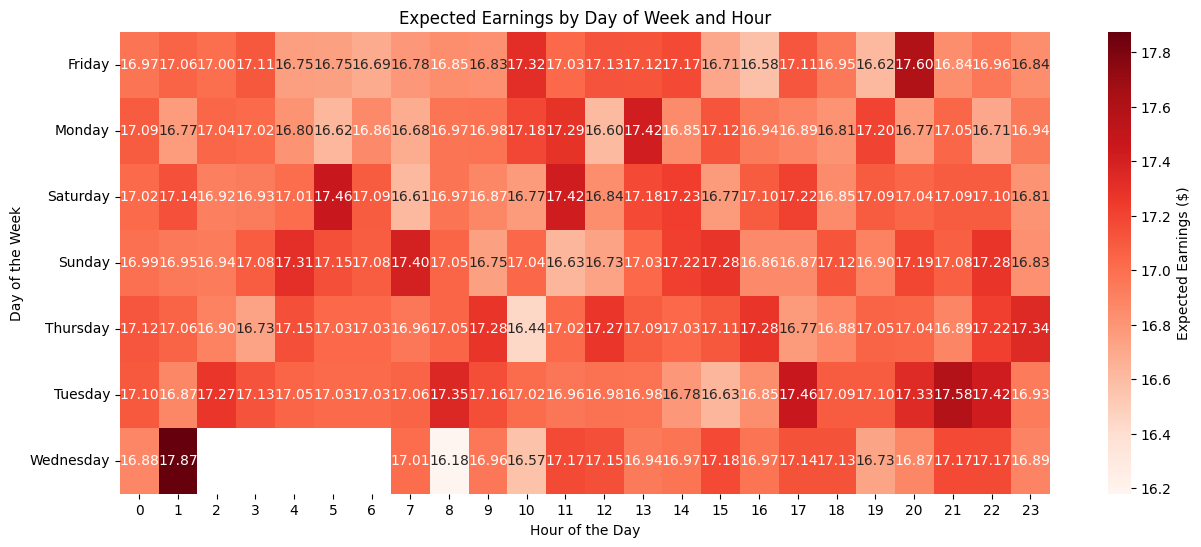

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(earnings_pivot, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Expected Earnings ($)'})
plt.title('Expected Earnings by Day of Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)
plt.show()